In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/spam.csv', encoding = "ISO-8859-1")

In [3]:
data.shape

(5572, 5)

In [4]:
data.sample(6)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2282,ham,Whom you waited for yesterday,NaN,NaN,NaN
4901,spam,* FREE* POLYPHONIC RINGTONE Text SUPER to 8713...,NaN,NaN,NaN
1809,ham,"Aight, I'll ask a few of my roommates",NaN,NaN,NaN
4960,ham,"A bit of Ur smile is my hppnss, a drop of Ur t...",NaN,NaN,NaN
143,ham,I know you are. Can you pls open the back?,NaN,NaN,NaN
5212,ham,K.k.how is your business now?,NaN,NaN,NaN


## 1. Data Cleaning

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# very less non-null values in last 3 columns, so they are of no use. Dropping them
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
# renaming the cols
data.rename(columns={'v1':'target','v2':'text'}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
# We need 1 in place of spam, and 0 in place of ham. So using LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
encoder.fit_transform(data['target'])

array([0, 0, 1, ..., 0, 0, 0])

In [11]:
data['target'] = encoder.fit_transform(data['target'])
data.sample(10)

,target,text
2033,0,IM GONNA MISS U SO MUCH
1635,0,You have come into my life and brought the sun...
3866,0,"Alright we're hooked up, where you guys at"
3674,0,Whos this am in class:-)
1471,0,Oh. U must have taken your REAL Valentine out ...
3227,1,"SIX chances to win CASH! From 100 to 20,000 po..."
2162,0,1) Go to write msg 2) Put on Dictionary mode 3...
434,0,You available now? I'm like right around hills...
5364,1,Call 09095350301 and send our girls into eroti...
1511,0,Oops sorry. Just to check that you don't mind ...


In [12]:
# check for missing values
data.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
# No missing values, Now check for duplicate values
data.duplicated().sum()

403

In [14]:
# There are 403 duplicates, so we need to remove them
data = data.drop_duplicates(keep='first')

In [15]:
data.duplicated().sum()

0

In [16]:
# Cleaned data having no duplicates and missing values
data.shape

(5169, 2)

## 2.EDA (Exploratory Data Analysis) for better understanding about *data*

In [17]:
# Count what % of data is spam or ham
data['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

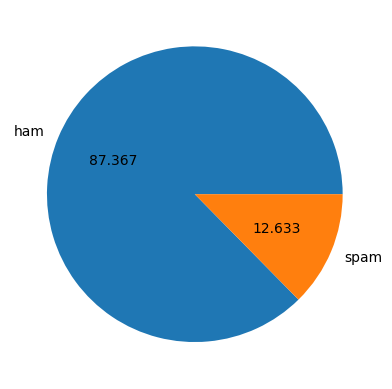

In [18]:
# As we can see data is very imbalanced, spam texts are only 12%, so we need to keep this in mind
plt.pie(data['target'].value_counts(), labels=['ham','spam'],autopct="%0.3f")
plt.show()

In [19]:
# Now we can count number of alphabets, words or sentence in each sms. For this we will be needing nltk library
!pip install nltk

In [20]:
import nltk

In [21]:
# just for downloading essential dependencies for nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
# we will be creating 3 columns, 1 for number of characters, 2nd for no of words and 3rd for number of sentences in each sms.
data['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [23]:
# 1st column num_chars
data['num_chars'] = data['text'].apply(len)

In [24]:
data.sample(10)

,target,text,num_chars
3422,1,Had your mobile 10 mths? Update to latest Oran...,158
2936,0,Lol yep did that yesterday. Already got my fir...,101
3275,0,Lol your right. What diet? Everyday I cheat an...,78
241,0,PLEASSSSSSSEEEEEE TEL ME V AVENT DONE SPORTSx,45
205,0,ÌÏ say until like dat i dun buy ericsson oso c...,64
4775,0,Quite lor. But dun tell him wait he get compla...,53
4803,0,"Er, hello, things didnÛ÷t quite go to plan Û...",114
5311,0,K.k:)i'm going to tirunelvali this week to see...,146
1566,0,I am late. I will be there at,29
5160,0,Ok... Then r we meeting later?,30


In [25]:
# 2nd column num_words
data['text'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [26]:
data['text'].apply(lambda x: len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

In [27]:
data['num_words'] = data['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [28]:
data.sample(10)

,target,text,num_chars,num_words
2426,1,Valentines Day Special! Win over å£1000 in our...,158,31
736,0,Thanks for looking out for me. I really apprec...,51,11
5400,0,HARD BUT TRUE: How much you show &amp; expres...,163,38
1157,0,He's an adult and would learn from the experie...,140,31
1897,0,"Aight, sounds good. When do you want me to com...",53,14
2547,1,"Text82228>> Get more ringtones, logos and game...",101,18
96,0,Watching telugu movie..wat abt u?,33,8
4700,0,I liked the new mobile,22,5
3198,0,No de.am seeing in online shop so that i asked.,47,11
2900,1,Ur cash-balance is currently 500 pounds - to m...,139,26


In [29]:
# 3rd column num_sent
data['num_sent'] = data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
data.sample(10)

,target,text,num_chars,num_words,num_sent
1868,0,Today my system sh get ready.all is well and i...,71,16,1
3565,0,Its ok..come to my home it vl nice to meet and...,59,17,1
805,0,I dled 3d its very imp,22,6,1
1985,0,The length is e same but e top shorter n i got...,123,34,4
5459,0,If you hear a loud scream in about &lt;#&gt; m...,120,32,1
3349,0,Sorry i cant take your call right now. It so h...,368,79,7
415,0,Whatsup there. Dont u want to sleep,35,8,2
4223,0,Double eviction this week - Spiral and Michael...,73,14,1
24,0,Ffffffffff. Alright no way I can meet up with ...,57,13,2
3142,0,Boy; I love u Grl: Hogolo Boy: gold chain kods...,156,40,2


In [31]:
# Now let's analyze meam, median etc on all the 3 columns
data[['num_chars','num_words','num_sent']].describe()

,num_chars,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
# let's analyze ham and spam separately
# for ham "data['target'] == 0"
data[data['target'] == 0][['num_chars','num_words','num_sent']].describe()

,num_chars,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
# for spam messages
data[data['target'] == 1][['num_chars','num_words','num_sent']].describe()

,num_chars,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [34]:
# After seeing above analysis, we can get idea how spam and ham messages are different. On an average, number of chars, words or sentences are greater
# in spam messages than ham messages

In [35]:
# we can plot the above analysis using seaborn
import seaborn as sns

<Axes: xlabel='num_chars', ylabel='Count'>

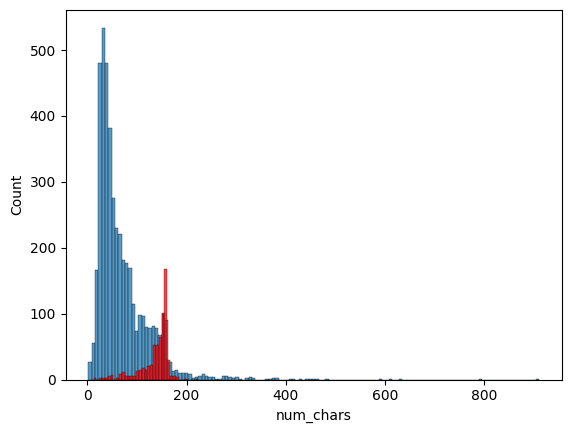

In [36]:
sns.histplot(data[data['target'] == 0]['num_chars'])
sns.histplot(data[data['target'] == 1]['num_chars'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

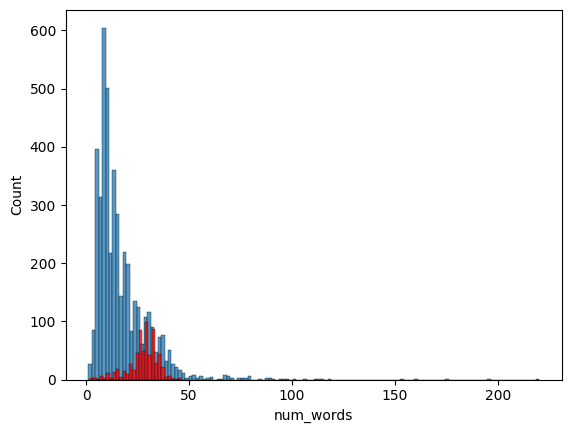

In [37]:
sns.histplot(data[data['target'] == 0]['num_words'])
sns.histplot(data[data['target'] == 1]['num_words'],color='red')

<Axes: xlabel='num_sent', ylabel='Count'>

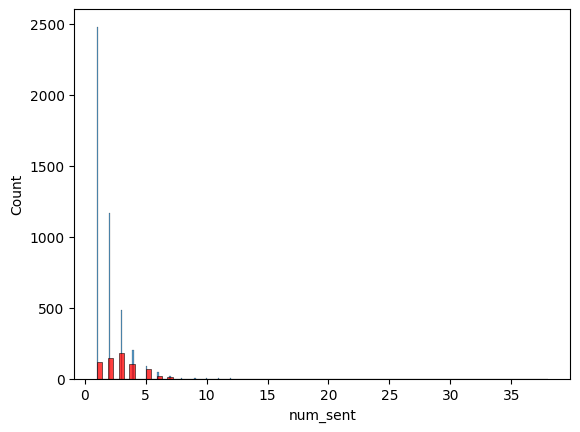

In [38]:
sns.histplot(data[data['target'] == 0]['num_sent'])
sns.histplot(data[data['target'] == 1]['num_sent'],color='red')

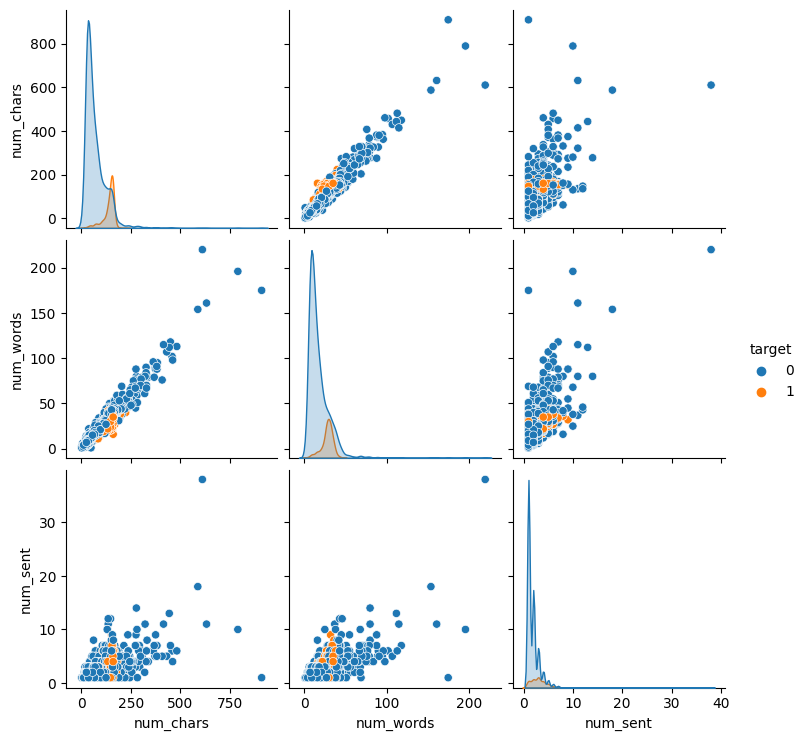

In [39]:
# correlation between 3 colums
sns.pairplot(data, hue='target')

In [40]:
# correlation coefficient
data.corr()

<ipython-input-40-2b8bd0afb3aa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,target,num_chars,num_words,num_sent
target,1.000000,0.384717,0.262912,0.263939
num_chars,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sent,0.263939,0.624139,0.679971,1.000000


<ipython-input-41-6c71ac866e2e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

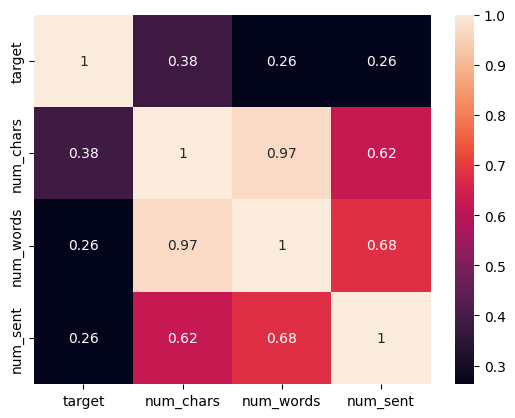

In [41]:
sns.heatmap(data.corr(),annot=True)

In [42]:
# nums_char have 0.38 correlation with target, so we will be using this column. We can't take all three columns because there are strong correlation between them.

## 3. Data Preprocessing (lower case, tokenization, removing special characters, stopwords and punctuation marks, stemming)

In [44]:
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [45]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('sexting')

'sext'

In [46]:
def transform_text(text):
    text = text.lower()  # lowercase
    text = nltk.word_tokenize(text) # tokenizing each word

    #removing special characters
    y = []
    for i in text:
        if i.isalnum():  #if alpha_numeric
            y.append(i)

    text = y[:]
    y.clear()

    # removing stopping words and punctuation marks
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    # Stemming
    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [47]:
transform_text("dsjf dfuids sdf reading cdsfuh. df i am dhsfds * dfd ss^^ xcvsd dsfs dff")

'dsjf dfuid sdf read cdsfuh df dhsfd dfd xcvsd dsf dff'

In [48]:
data['text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [50]:
data['transformed_text'] = data['text'].apply(transform_text)

In [51]:
data.sample(10)

,target,text,num_chars,num_words,num_sent,transformed_text
1954,0,Good night. Am going to sleep.,30,8,2,good night go sleep
4986,0,No rushing. I'm not working. I'm in school so ...,70,20,3,rush work school rush go hungri
4180,0,"Ok da, i already planned. I wil pick you.",41,12,2,ok da alreadi plan wil pick
1751,0,* Was thinking about chuckin ur red green n bl...,92,18,1,think chuckin ur red green n black trainner 2 ...
165,0,I place all ur points on e cultures module alr...,51,11,1,place ur point e cultur modul alreadi
965,0,Or better still can you catch her and let ask ...,85,25,1,better still catch let ask sell lt gt
2891,0,Babe? You said 2 hours and it's been almost 4 ...,73,18,2,babe said 2 hour almost 4 internet
5012,0,"Uncle G, just checking up on you. Do have a re...",59,14,2,uncl g check reward month
4441,0,Dear i am not denying your words please,39,8,1,dear deni word pleas
4627,1,Todays Voda numbers ending with 7634 are selec...,166,30,2,today voda number end 7634 select receiv rewar...


In [57]:
# word cloud shows important words in sms in bigger format
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [58]:
# for spam texts
spam_wc = wc.generate(data[data['target'] == 1]['transformed_text'].str.cat(sep=" "))

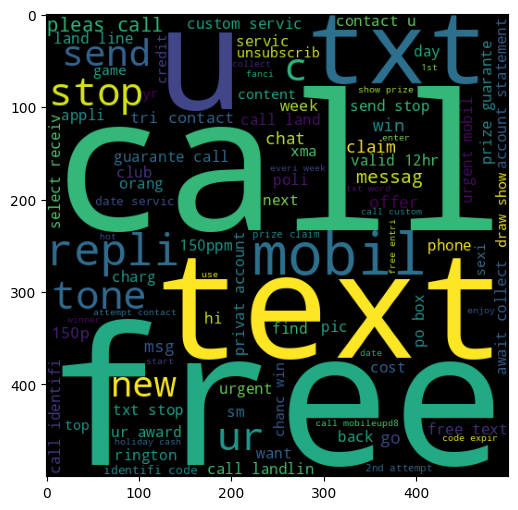

In [59]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [61]:
ham_wc = wc.generate(data[data['target'] == 0]['transformed_text'].str.cat(sep=" "))

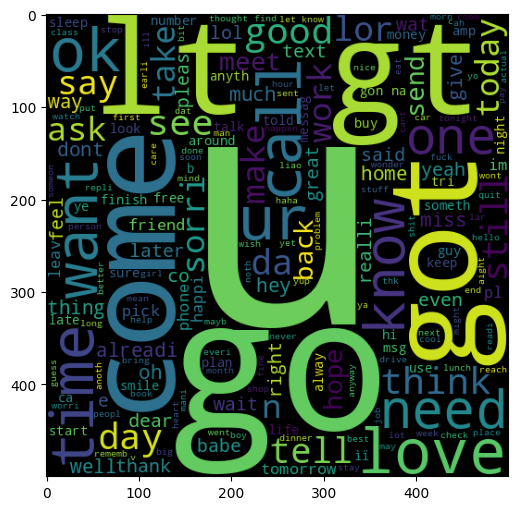

In [62]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [63]:
# Now let's focus on top 30 words used in spam and ham

In [66]:
spam_corpus = []
for text in data[data['target'] == 1]['transformed_text'].tolist():
    for word in text.split():
        spam_corpus.append(word)

spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

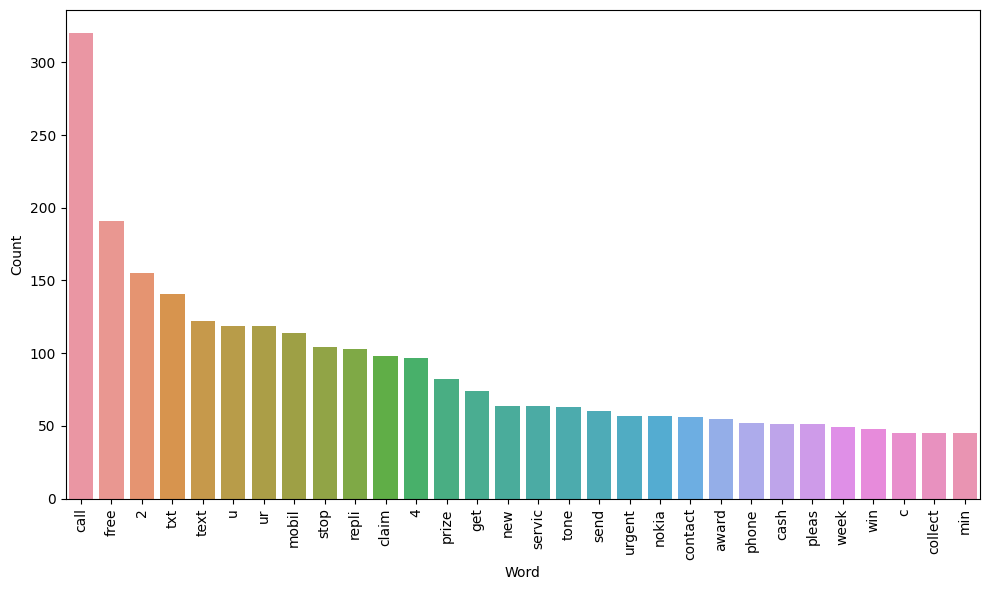

In [70]:
from collections import Counter
spam_counter = Counter(spam_corpus)
most_common_words = spam_counter.most_common(30)

# Creating a DataFrame from the Counter output
df_most_common = pd.DataFrame(most_common_words, columns=['Word', 'Count'])

# Using Seaborn to create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Count', data=df_most_common)
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

In [72]:
# For ham messages
ham_corpus = []
for text in data[data['target'] == 0]['transformed_text'].tolist():
    for word in text.split():
        ham_corpus.append(word)

len(ham_corpus)

35404

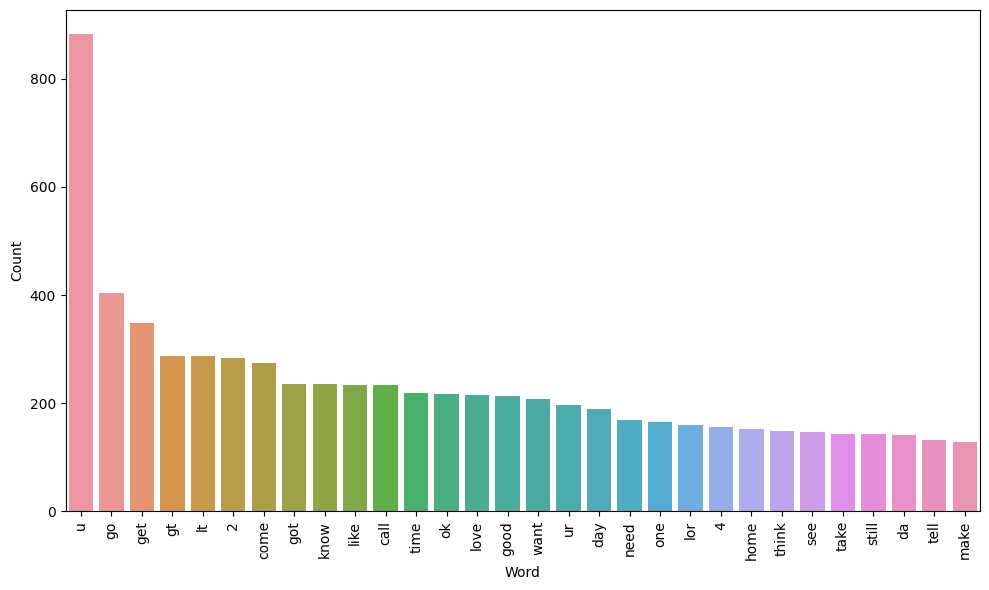

In [73]:
ham_counter = Counter(ham_corpus)
most_common_words = ham_counter.most_common(30)

# Creating a DataFrame from the Counter output
df_most_common = pd.DataFrame(most_common_words, columns=['Word', 'Count'])

# Using Seaborn to create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Count', data=df_most_common)
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

## 4. Model Building

In [75]:
# Bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [77]:
data['transformed_text']

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: transformed_text, Length: 5169, dtype: object

In [84]:
X = cv.fit_transform(data['transformed_text']).toarray()

In [120]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [87]:
y = data['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)  # 20% test size

In [90]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [91]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [92]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [ ]:
# precision score is very less, so above GaussianNB is performing not well;

In [96]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [97]:
# precision score is still not good, since imbalanced data so accuracy will not matter as precision score

In [100]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [ ]:
# So as of now Bernaulli NB is performing really well

In [101]:
# Now let's use TFIDF instead of Bag of words to convert text to numerical
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [102]:
X = tfidf.fit_transform(data['transformed_text']).toarray()

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)  # 20% test size

In [104]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [105]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [106]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [ ]:
# Now precision score is 1 which is very good.

In [107]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [109]:
# So now we have option to go with either BNB or MNB, sice accuraccy is not of much interest in case of imbalanced data, so we will
# go with MNB since it has high precision i.e we are going with TFIDF & MNB

In [110]:
# Now lets try other ML models and compare with MNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [111]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [112]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [113]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [115]:
train_classifier(mnb,X_train,y_train,X_test,y_test)

(0.9709864603481625, 1.0)

In [117]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print()

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865

For  KN
Accuracy -  0.9052224371373307
Precision -  1.0

For  NB
Accuracy -  0.9709864603481625
Precision -  1.0

For  DT
Accuracy -  0.9303675048355899
Precision -  0.8367346938775511

For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703

For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829

For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089

For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659

For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406

For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192

For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9333333333333333



In [118]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [119]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.967118,0.933333
6,AdaBoost,0.960348,0.929204
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217
